In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import sklearn 
print("sklearn version", sklearn.__version__)

sklearn version 1.0.2


In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt 

In [4]:
test_df = pd.read_csv('../input/titanic/test.csv')

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df = pd.read_csv('../input/titanic/train.csv')

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.shape

(891, 12)

## now let's bring all the data into a single frame

In [9]:
train_df['train_test'] = 1 
test_df['train_test'] = 0
test_df['Survived'] = np.NaN

full_df = pd.concat([train_df, test_df])
full_df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S,1
96,97,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1
97,98,1.0,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,1
98,99,1.0,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,1


In [10]:
full_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [11]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [12]:
full_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

## let's do some basic data preprocessing

In [13]:
#find null values in our training data 
full_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64

In [14]:
# let's create a feature out of if cabin class is availabel 

full_df['Cabin_class'] = np.where(full_df['Cabin'].isna(),0,1)
full_df = pd.DataFrame(full_df.drop('Cabin', axis = 1))
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,Cabin_class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0


In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Embarked']),
    remainder='passthrough',
    verbose_feature_names_out = False)

transformed = transformer.fit_transform(full_df)
full_df_encoded = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out())

full_df_encoded.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,train_test,Cabin_class
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,1,0
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,1,0
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1,1,1
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.05,1,0


In [16]:
full_df_encoded_trim= full_df_encoded.drop(['Name', 'SibSp', 'Parch','Ticket'], axis = 1)
full_df_encoded_trim.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,PassengerId,Survived,Pclass,Age,Fare,train_test,Cabin_class
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0.0,3,22.0,7.25,1,0
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1.0,1,38.0,71.2833,1,1
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1.0,3,26.0,7.925,1,0
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1.0,1,35.0,53.1,1,1
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0.0,3,35.0,8.05,1,0


### break back into train and test 

In [17]:
X_train = full_df_encoded_trim[full_df_encoded_trim.train_test == 1].drop(['train_test'], axis =1)
X_test = full_df_encoded_trim[full_df_encoded_trim.train_test == 0].drop(['train_test'], axis =1)
print('training shape:', X_train.shape)
print('testing shape:', X_test.shape)

training shape: (891, 12)
testing shape: (418, 12)


In [18]:
X_train.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,PassengerId,Survived,Pclass,Age,Fare,Cabin_class
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0.0,3,22.0,7.25,0
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1.0,1,38.0,71.2833,1
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1.0,3,26.0,7.925,0
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1.0,1,35.0,53.1,1
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0.0,3,35.0,8.05,0


In [19]:
y = X_train.Survived
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: object

In [20]:
X_train = X_train.drop('Survived', axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y,train_size=0.8, test_size=0.2,random_state=0)

In [22]:
y_valid.head()

495    0.0
648    0.0
278    0.0
31     1.0
255    1.0
Name: Survived, dtype: object

In [23]:
print("train shape:", X_train.shape, y_train.shape)
print("valid shape:", X_valid.shape, y_valid.shape)

train shape: (712, 11) (712,)
valid shape: (179, 11) (179,)


In [24]:
y_test = pd.DataFrame(X_test['Survived'])
y_test.head()

,Survived
891,NaN
892,NaN
893,NaN
894,NaN
895,NaN


In [25]:
X_test = X_test.drop('Survived', axis = 1)

In [26]:
from sklearn.impute import SimpleImputer 

my_imputer = SimpleImputer() 

X_train_imputed = pd.DataFrame(my_imputer.fit_transform(X_train)) 
X_valid_imputed = pd.DataFrame(my_imputer.transform(X_valid))
X_test_imputed = pd.DataFrame(my_imputer.transform(X_test))

X_train_imputed.columns = X_train.columns
X_valid_imputed.columns = X_valid.columns
X_test_imputed.columns = X_test.columns



In [27]:
print('x_train nulls:', X_test_imputed.isnull().sum())

x_train nulls: Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Embarked_nan    0
PassengerId     0
Pclass          0
Age             0
Fare            0
Cabin_class     0
dtype: int64


**stopped here**

In [28]:
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler() 
X_train_imputed_scaled = pd.DataFrame(X_train_imputed)
X_valid_imputed_scaled = pd.DataFrame(X_valid_imputed)
X_test_imputed_scaled = pd.DataFrame(X_test_imputed)

X_train_imputed_scaled[['Age', 'Pclass', 'Fare']] = my_scaler.fit_transform(X_train_imputed_scaled[['Age', 'Pclass', 'Fare']])
X_valid_imputed_scaled[['Age', 'Pclass', 'Fare']] = my_scaler.transform(X_valid_imputed_scaled[['Age', 'Pclass', 'Fare']])
X_test_imputed_scaled[['Age', 'Pclass', 'Fare']] = my_scaler.transform(X_test_imputed_scaled[['Age', 'Pclass', 'Fare']])

X_train_imputed_scaled.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,PassengerId,Pclass,Age,Fare,Cabin_class
0,1.0,0.0,1.0,0.0,0.0,0.0,141.0,1.0,0.366509,0.029758,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,440.0,0.5,0.382327,0.020495,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,818.0,0.5,0.382327,0.072227,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,379.0,1.0,0.243666,0.007832,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,492.0,1.0,0.256271,0.014151,0.0


# Reworking the notebook from here 

In [29]:
X_test_imputed_scaled.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,PassengerId,Pclass,Age,Fare,Cabin_class
0,0.0,1.0,0.0,1.0,0.0,0.0,892.0,1.0,0.426446,0.015282,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,893.0,1.0,0.584016,0.013663,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,894.0,0.5,0.773100,0.018909,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,895.0,1.0,0.331905,0.016908,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,896.0,1.0,0.268877,0.023984,0.0


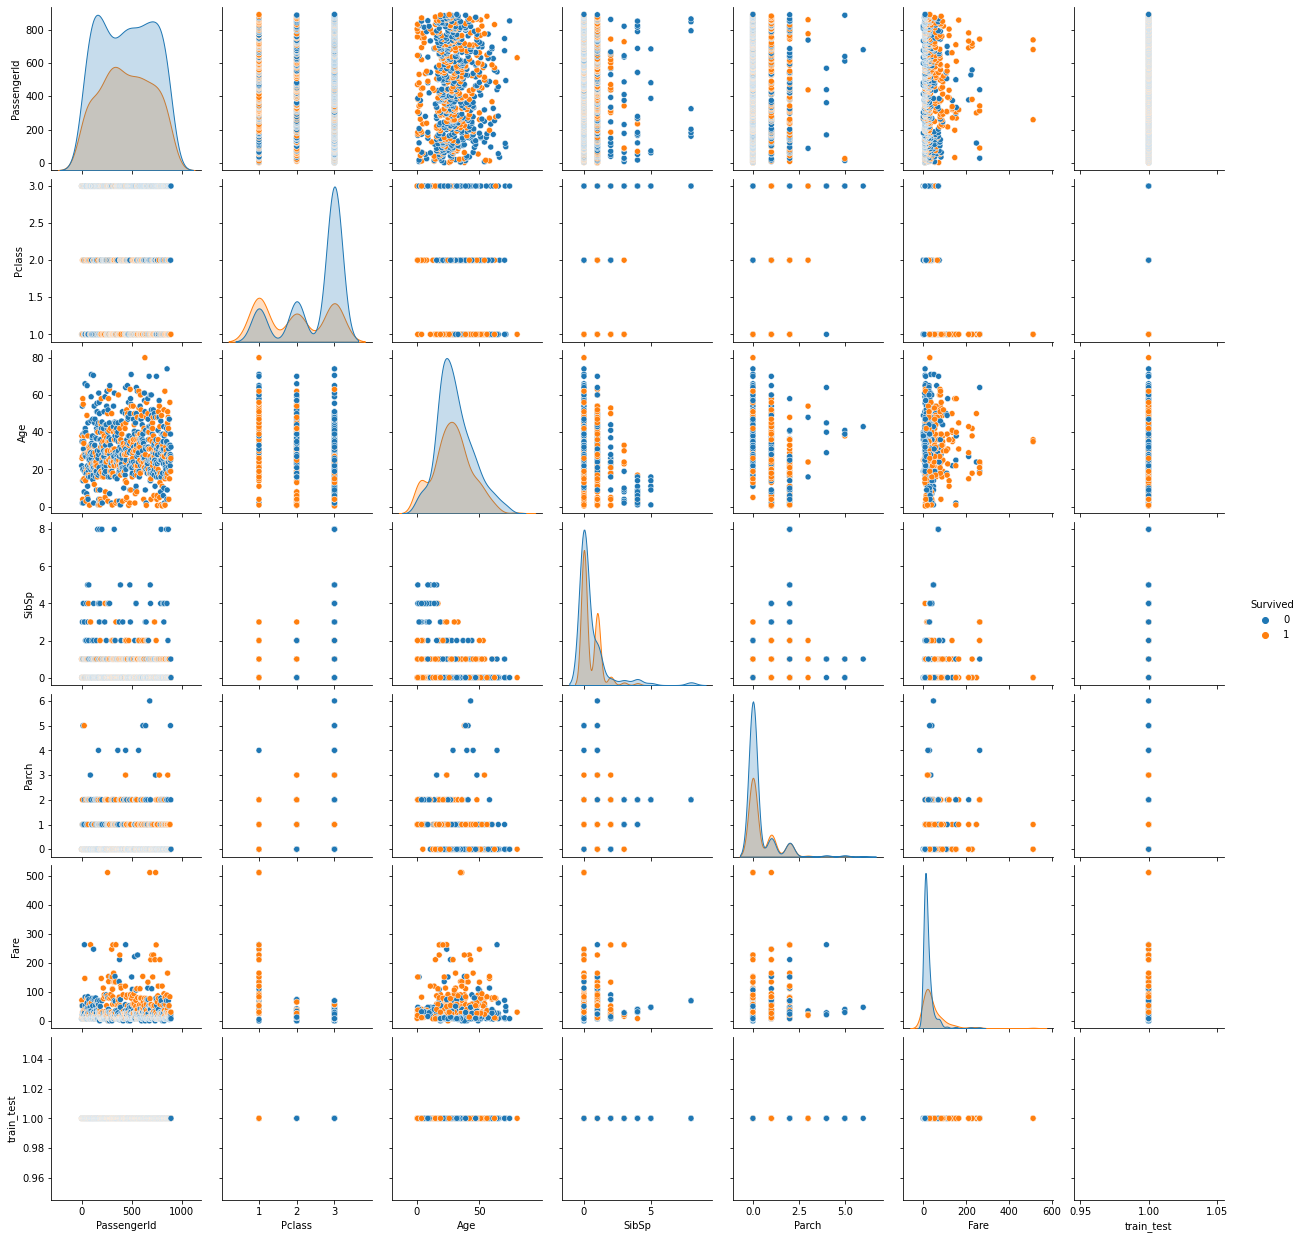

In [30]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.pairplot(train_df, hue='Survived')

In [31]:
X_train_imputed_scaled.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,PassengerId,Pclass,Age,Fare,Cabin_class
0,1.0,0.0,1.0,0.0,0.0,0.0,141.0,1.0,0.366509,0.029758,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,440.0,0.5,0.382327,0.020495,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,818.0,0.5,0.382327,0.072227,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,379.0,1.0,0.243666,0.007832,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,492.0,1.0,0.256271,0.014151,0.0


In [32]:
y_train=y_train.astype('int')

In [33]:
y_valid = y_valid.astype(int)

train score: 0.8665730337078652
valid score: 0.8156424581005587


[Text(0.4536290322580645, 0.9285714285714286, 'X[0] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.19556451612903225, 0.7857142857142857, 'X[8] <= 0.168\ngini = 0.31\nsamples = 465\nvalue = [376, 89]'),
 Text(0.06451612903225806, 0.6428571428571429, 'X[7] <= 0.75\ngini = 0.492\nsamples = 32\nvalue = [14, 18]'),
 Text(0.04838709677419355, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.08064516129032258, 0.5, 'X[9] <= 0.041\ngini = 0.444\nsamples = 21\nvalue = [14, 7]'),
 Text(0.03225806451612903, 0.35714285714285715, 'X[2] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.016129032258064516, 0.21428571428571427, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.04838709677419355, 0.21428571428571427, 'X[8] <= 0.137\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03225806451612903, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06451612903225806, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Te

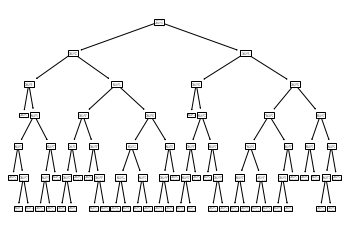

In [34]:
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier

treeclf=DecisionTreeClassifier(max_depth=6, random_state=0) 
treeclf.fit(X_train_imputed_scaled, y_train)
print('train score:' ,treeclf.score(X_train_imputed_scaled, y_train))
print('valid score:', treeclf.score(X_valid_imputed_scaled,y_valid))
tree.plot_tree(treeclf)

In [35]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(treeclf,X_train_imputed_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.71328671 0.82517483 0.78873239 0.74647887 0.84507042]
0.7837486457204766


In [36]:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_imputed_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76223776 0.76223776 0.79577465 0.78169014 0.78169014]
0.7767260908105978


In [37]:
from sklearn.ensemble import RandomForestClassifier

randomclf = RandomForestClassifier(n_estimators=500, random_state= 0)
randomclf.fit(X_train_imputed_scaled, y_train)
print('train score:' ,randomclf.score(X_train_imputed_scaled, y_train))
print('valid score:', randomclf.score(X_valid_imputed_scaled,y_valid))

train score: 1.0
valid score: 0.8435754189944135


In [38]:
hidden_layer_sizes = [10,10,10]

In [39]:
from sklearn.neural_network import MLPClassifier 
mlp10 = MLPClassifier(solver = 'adam', random_state = 0)

mlp10.fit(X_train_imputed_scaled , y_train)

print("Accuracy on training set:", mlp10.score(X_train_imputed_scaled, y_train))
print("Accuracy on valid set: ", mlp10.score(X_valid_imputed_scaled, y_valid))

Accuracy on training set: 0.7752808988764045
Accuracy on valid set:  0.8156424581005587


In [40]:
gnb.fit(X_train_imputed_scaled, y_train)
print('train score:' ,gnb.score(X_train_imputed_scaled, y_train))
print('valid score:', gnb.score(X_valid_imputed_scaled,y_valid))

train score: 0.7794943820224719
valid score: 0.7988826815642458


In [41]:
y_valid.T

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

linear_svm = LinearSVC() 
linear_svm.fit(X_train_imputed_scaled, y_train)
print('train score:' ,linear_svm.score(X_train_imputed_scaled, y_train))
print('valid score:', linear_svm.score(X_valid_imputed_scaled,y_valid))

train score: 0.7401685393258427
valid score: 0.7430167597765364


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [43]:
cv = cross_val_score(linear_svm,X_train_imputed_scaled,y_train,cv=20)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[0.66666667 0.86111111 0.66666667 0.33333333 0.88888889 0.69444444
 0.47222222 0.75       0.72222222 0.61111111 0.72222222 0.77777778
 0.77142857 0.74285714 0.68571429 0.85714286 0.85714286 0.65714286
 0.42857143 0.74285714]
0.6954761904761904


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [44]:
y_train.head()

140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64

In [45]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.05) 
xgb.fit(X_train_imputed_scaled,y_train)
print('train score:' ,xgb.score(X_train_imputed_scaled, y_train))
print('valid score:', xgb.score(X_valid_imputed_scaled,y_valid))

train score: 0.9115168539325843
valid score: 0.8435754189944135


### Now let's start making some predictions! 

In [46]:
y_predictions = xgb.predict(X_test_imputed_scaled).astype(int)
submission = {'PassengerId' : test_df.PassengerId, 'Survived': y_predictions}
submmission_df = pd.DataFrame(data = submission)
submmission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [47]:
submmission_df.to_csv('Titantic_submissions.csv', index = False)